# Laboratory 2.4: Linear Regression contd.

In this practice you will extend your Linear Regression code to a more general case. Here you will need the `synthetic_dataset.csv` present in the .zip file you downloaded alongside this notebook.

In addition, we will be using the following libraries:
- Data management:
    - [numpy](https://numpy.org/)
    - [pandas](https://pandas.pydata.org/)
    - [scipy](https://scipy.org/)
- Modelling:
    - [scikit-learn](https://scikit-learn.org)
- Plotting:
    - [seaborn](https://seaborn.pydata.org/)
    - [matplotlib](https://matplotlib.org/)
    
### **All the things you need to do are marked by a "TODO" comment nearby. Make sure you *read carefully everything before working* and solve each point before submitting your solution.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys
# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to sys.path
sys.path.insert(0, project_root)

### Custom Linear Regression model

You are going to be working with the following class that you already know from the previous practice, so feel free to recycle as much code as you want (or can). In this case, you will be enhancing its functionalities, getting a more general function than the one you implemented before. 

**For now, just continue with the practice and do not fill anything, you will come back later to fill the gaps.**

In [2]:
from src.Lab_2_4_LR2 import LinearRegressor


**Data**: Remember, from the previous lab session, we had the following univariate dataset:

In [3]:
# Define data to use in this practice
x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

Use the code *you wrote* from the previous practice (not the sklearn version) to fit the data in the following cell

In [4]:
linreg = LinearRegressor()
linreg.fit(x, y)

Before we get into the things you'll do today, let's construct a function that provides the values for the $R^2$, RMSE and MAE. For this, the inputs of this function are the true $y$ values and the predicted $\hat{y}$ values

In [5]:
from src.Lab_2_4_LR2 import evaluate_regression

In [6]:
# Obtain regression performance metrics
y_pred = linreg.predict(x)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.9201359388275276, 'RMSE': 1.0126472956832233, 'MAE': 0.8945454545454552}


## Polynomial regression

In the previous practice, you have trained a model assuming that the relationship between input and output is linear. However, in most real cases this is not common and the relationship between input and output is not linear. In this section, we are going to learn how to deal with non-linear relationships when using linear models. Read `synthetic_dataset.csv` and train a linear regression model. 

*The target variable is the last column of the dataset*

In [7]:
data = pd.read_csv("synthetic_dataset.csv")

X = np.array(data[["Input1","Input2","Input3","Input4"]])
y = np.array(data["Output"]) 

In this case we will skip the preprocessing and go straight to the modelling phase. Therefore, fit the model here.

In [8]:
linreg = LinearRegressor()
linreg.fit(X, y)

In [9]:
evaluate_regression(y,linreg.predict(X))

{'R2': 0.5452814241832913,
 'RMSE': 3.1936452748702813,
 'MAE': 2.2373945210247843}

If you trained the model well, the $R^2$ metric will be terrible, in the order of $0.5$. **What happened here?** Let's try to clear this via the *study of the residuals*.

Create a function to plot the residuals of the model. This function shall:
- Create a **histogram** of the residuals.
- Create a **Q-Q plot** of the residuals.
- Create a **scatterplot of the residuals against each input variable, the true output variable and the predictions**.

**Why do we want to check the residuals this way?** 

> Se quiere comprobar los residuales debido al bajo valor obtenido de R^2, al ser 0.5, no tan cercano a 1 como se esperaría. Esto indica que no se están capturando los datos correctamente. Por tanto, graficar puede ayudar a determinar dónde se encuentra el error. Por ejemplo, que los datos no tengan linealidad.

In [25]:
def plot_residuals(data, output_column, prediction_column):
    """
    Plot residuals of a model against all variables in the DataFrame, using box plots for
    categorical variables and scatter plots for continuous variables. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
    """
    residuals = data[output_column] - data[prediction_column]
    
    num_features = len(data.columns) - 2  # Exclude output and prediction columns

    # Determine the number of rows and columns for subplots
    num_rows = int(np.ceil(np.sqrt(num_features + 4)))  # Add 4 for histogram, Q-Q plot, true output vs residuals, and predictions vs residuals
    num_cols = int(np.ceil((num_features + 4) / num_rows))

    # Plot histogram of residuals
    plt.figure(figsize=(5 * num_cols, 4 * num_rows))
    plt.subplot(num_rows, num_cols, 1)
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    # Plot Q-Q plot of residuals (tip: use stats.probplot from scipy)
    plt.subplot(num_rows, num_cols, 2)
    stats.probplot(residuals, dist="norm", plot=plt)       # Fill the code here
    plt.title('Q-Q Plot of Residuals')

    # Plot residuals against output variable
    plt.subplot(num_rows, num_cols, 3)
    plt.scatter(data[output_column], residuals, alpha=0.5)     # Fill the code here
    plt.title('Residuals vs True Output')
    plt.xlabel('True Output')
    plt.ylabel('Residuals')

    # Plot residuals against prediction variable
    plt.subplot(num_rows, num_cols, 4)
    plt.scatter(data[prediction_column], residuals, alpha=0.5)   # Use this as example for later
    plt.title('Residuals vs Predictions')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')

    # Plot residuals against each input variable
    for i, col in enumerate(data.columns):
        if col not in [output_column, prediction_column]:
            plt.subplot(num_rows, num_cols, i + 5)
            plt.scatter(data[col], residuals, alpha=0.5)   # Fill the code here
            plt.title(f'Residuals vs {col}')
            plt.xlabel(col)
            plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()

Now, **print the coefficients** of the model **alongside the plots** you can generate with the previous function

Coefficients of the model: {'coefficients': array([-1.91180984e-03, -5.98029466e-03,  1.63032400e+00,  3.05930873e+00])}


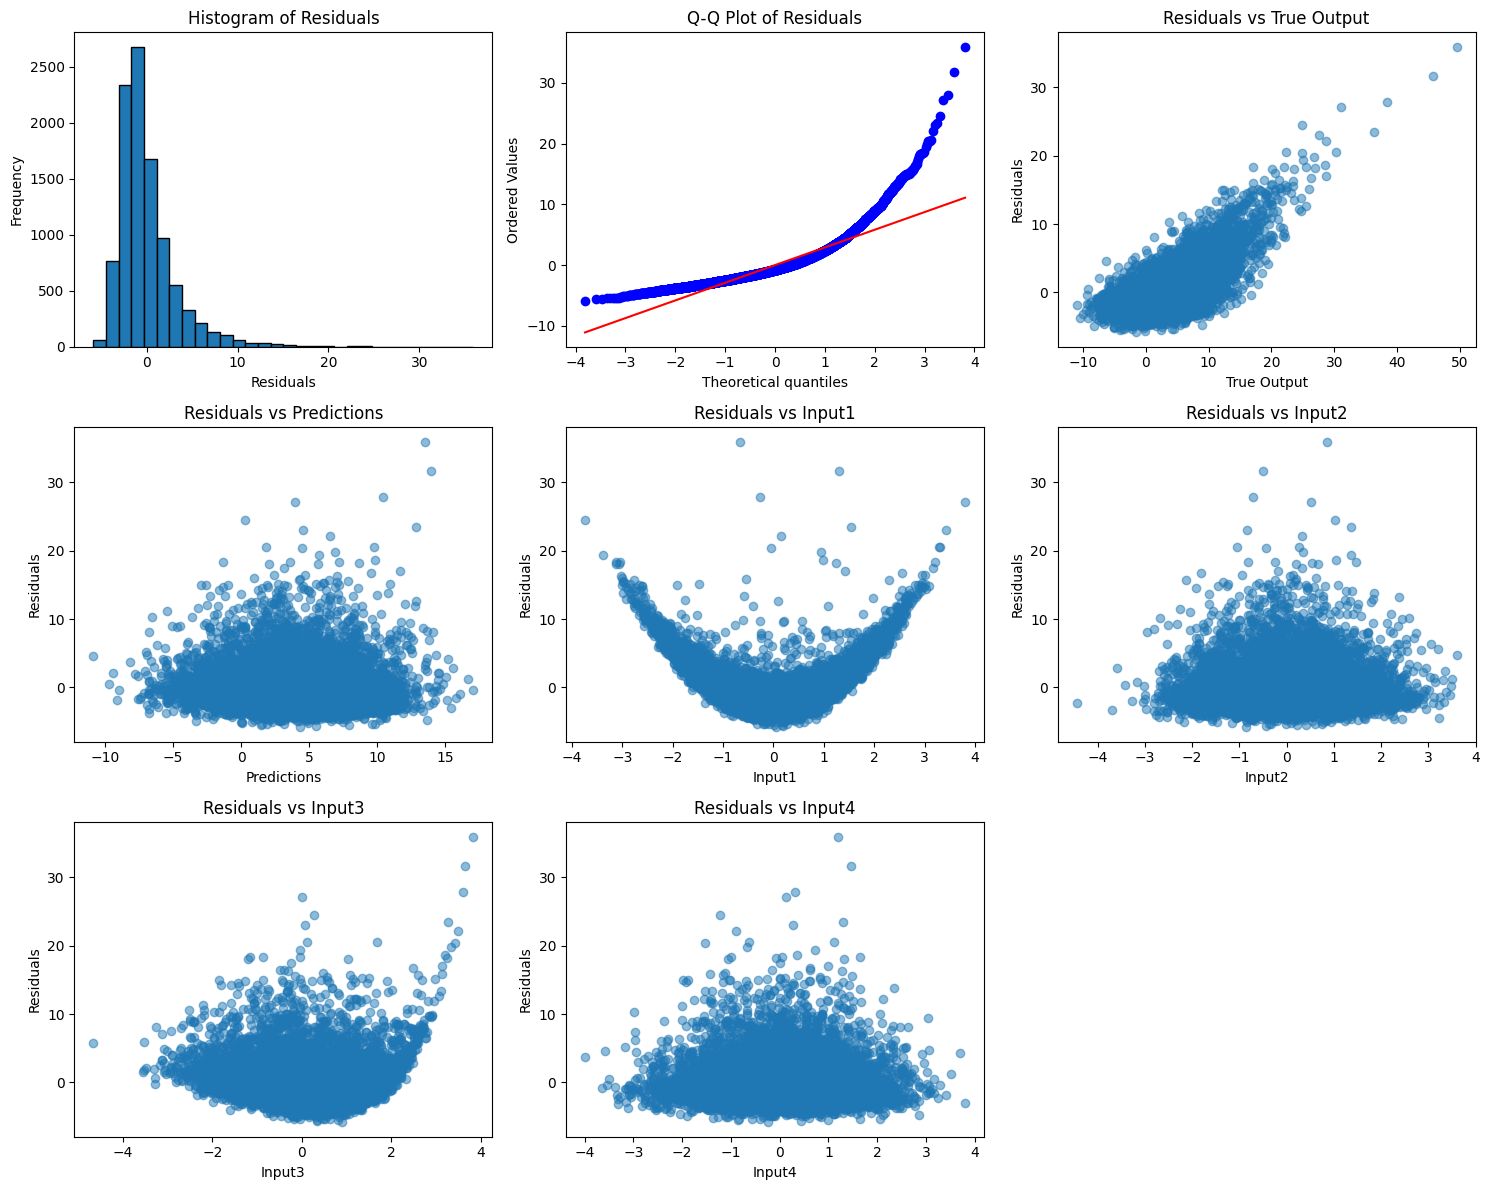

In [27]:
# First, construct a dictionary of the coefficients to print them
coef_dict = {"coefficients":linreg.coefficients} 
print(f"Coefficients of the model: {coef_dict}")

# Plot the residuals for the predictions
data["Predictions"] = linreg.predict(X)
plot_residuals(data, 'Output', 'Predictions')

**What are we seeing here? Is there any way to improve the model?**
> En el histograma se observa que el modelo creado subestima bastantes valores, dándole un valor menor del que tienen. Por otra parte el qq plot muestra que los residuos se desvían de la distribución normal (la línea roja), que normalmente nería una normal con media 0. El gráfico de residuals vs true output por su parte, muestra que cuanto mayor es el valor, mayor es el residuo. Todo eso sumado a los siguientes gráficos da la conclusión de que el modelo no se adapta a los datos debido a que estos no siguen una relación lineal.
> Para mejorar el modelo, se pueden probar métodos no lineales como fit_gradient_descent, el cual ajustará los datos de forma no lineal.

As you may expect, you should see some higher-order contribution to the behavior of the data, since some of the residuals have clear structures. In particular, `Input1` has a higher-order polynomial contribution (*which order do you think?*), while `Input2` has an *exponential* form. 

In order to fit a regression model with these contributions, construct a new dataframe where each column corresponds to the desired manipulation of each variable. Then, fit the regression model and see the results.

* Also, pay attention to the fact that you can use whatever contribution you see fit here, not just these previous ones.

In [48]:
data_transf = pd.DataFrame({'Input1': data["Input1"] ** 1,   # Substitute "None" by the degree you think works here
                            'Input2': np.exp(data["Input2"]),
                            'Input3': data["Input3"],
                            'Input4': data["Input3"],
                            'Output': data["Output"]})
X_transf = data_transf.iloc[:,:4].values

# Train linear regression model
linreg = LinearRegressor()
linreg.fit(X_transf, y)

# Evaluate the metrics to see the behavior
y_pred = linreg.predict(X_transf)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.11531719713948585, 'RMSE': 4.45460418801931, 'MAE': 3.3899074774092646}


Now, print again the coefficients for the model and plot the residuals as you did before.

**What do you observe?**
> Parece que no ha habido mejoría respecto al anterior modelo, de hecho a disminuido el R^2. Aunque parece que los puntos obtenidos están más juntos que antes, por lo tanto se ha reducido la varanza. 

Coefficients of the model: {'Input1': 0.0030182576968967104, 'Input2': 0.006366426459478854, 'Input3': -0.05010620370106356, 'Input4': 2.051036919705466}


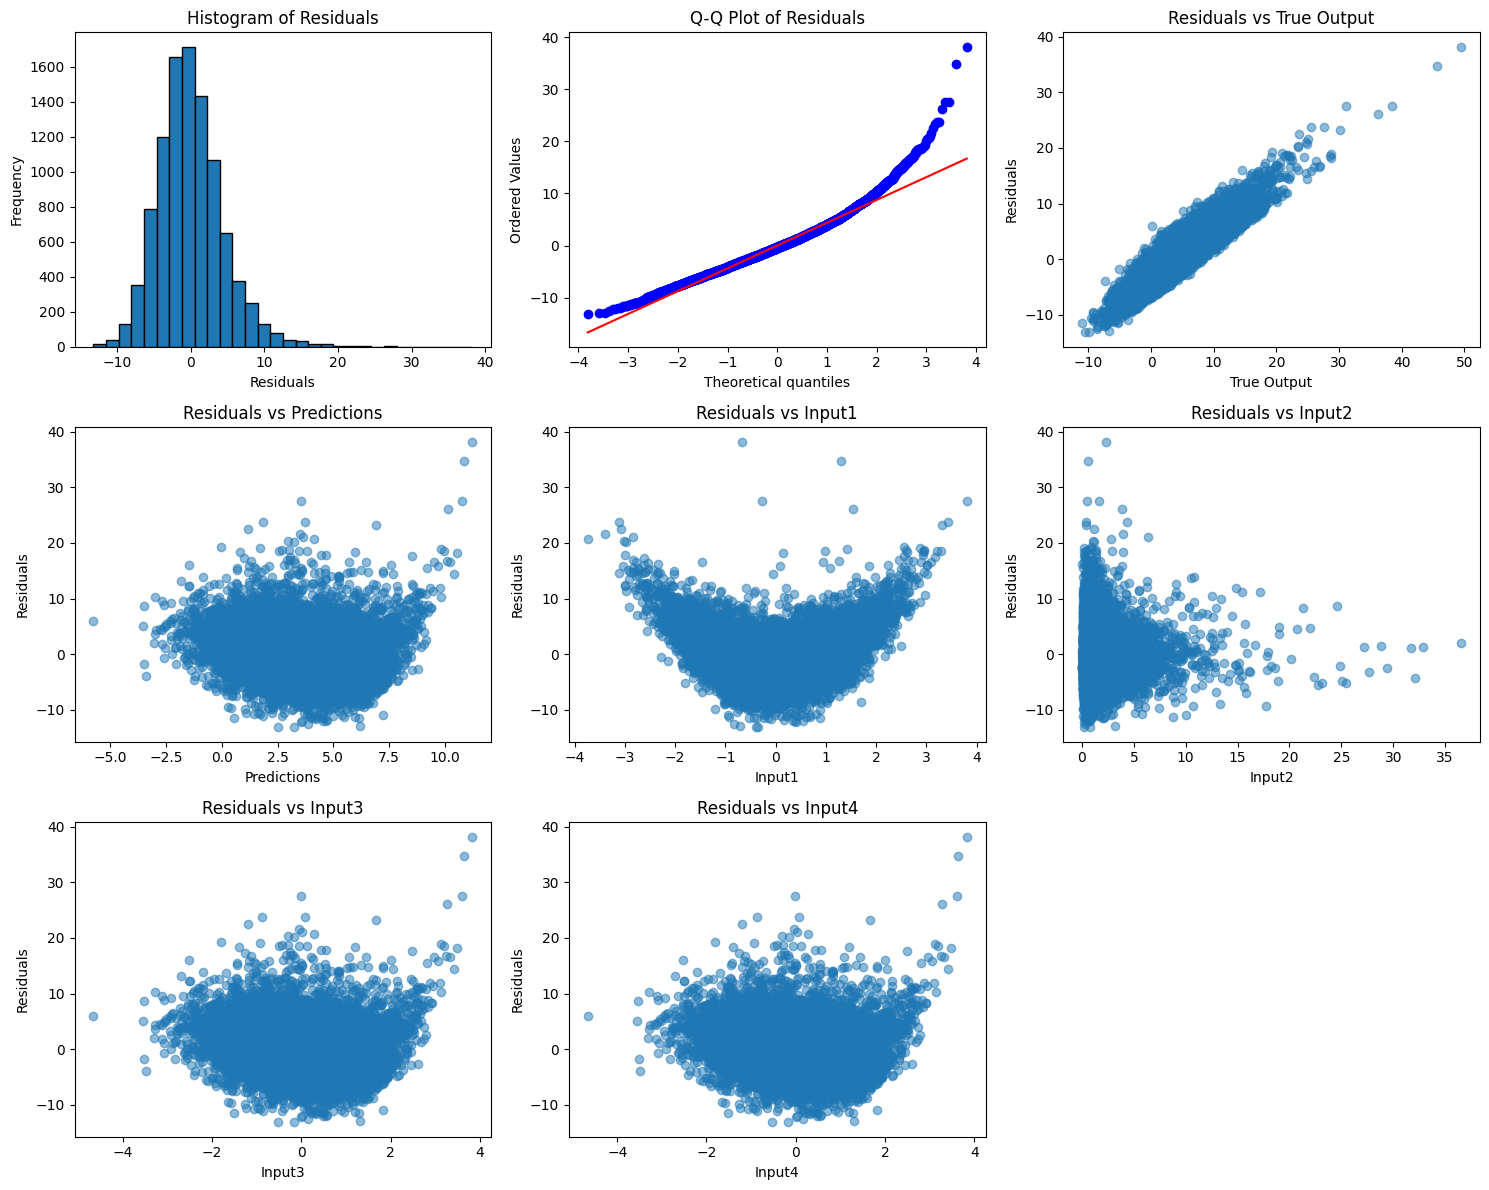

In [50]:
coef_dict = {'Input' + str(i+1): coef for i, coef in enumerate(linreg.coefficients)}
print(f"Coefficients of the model: {coef_dict}")
data_transf["Predictions"] = linreg.predict(X_transf)
plot_residuals(data_transf, 'Output', 'Predictions')

## Categorical variables

Linear regression, as is, can not deal with categorical variables. Therefore, we need to encode the variables when preprocessing the data. Complete the one-hot-encode function below. Take into account that strings shall be treated automatically as categorical variables.
<center>

![Image](https://miro.medium.com/v2/resize:fit:1358/1*ggtP4a5YaRx6l09KQaYOnw.png)

</center>

In [10]:
from src.Lab_2_4_LR2 import one_hot_encode


We will use this in a usual dataset from the internet. If everything is well, you should be able to run the following code as-is.

In [11]:
# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)


y = data['charges'].values
X = data.drop(columns=['charges']).values

# Preprocess the data
# Identify categorical columns for one-hot encoding
categorical_columns = [data.columns.get_loc(col) for col in ['sex', 'smoker', 'region']]

# One-hot encode categorical variables
X_encoded = one_hot_encode(X, categorical_columns, drop_first=True)
X_encoded = X_encoded.astype(float)                                  # Watch out for this!

# Instantiate and fit the LinearRegressor
model = LinearRegressor()
model.fit(X_encoded, y)

# Predict and evaluate
y_pred = model.predict(X_encoded)
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)

{'R2': 0.7509130345985207, 'RMSE': 6041.6796511744515, 'MAE': 4170.886894163565}


Compare yourself with scikit

In [12]:
from sklearn.linear_model import LinearRegression

# Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

# Preprocess the data
# TODO: One-hot encode categorical variables. Use pd.get_dummies()
data_encoded = pd.get_dummies(data, drop_first=True) 

# Split the data into features (X) and target (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X)

# Evaluate the model
evaluation_metrics = evaluate_regression(y, y_pred)
print(evaluation_metrics)


{'R2': 0.7509130345985207, 'RMSE': 6041.6796511744515, 'MAE': 4170.886894163585}


### Colored residuals

Now that we have categorical variables, the relationship between inputs and outputs might differ for different levels of the categorical variables. Therefore, you will modify the `plot_residuals` function to **color the scatter plots based on the value of a specific categorical variable**.

c:\Users\sergi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


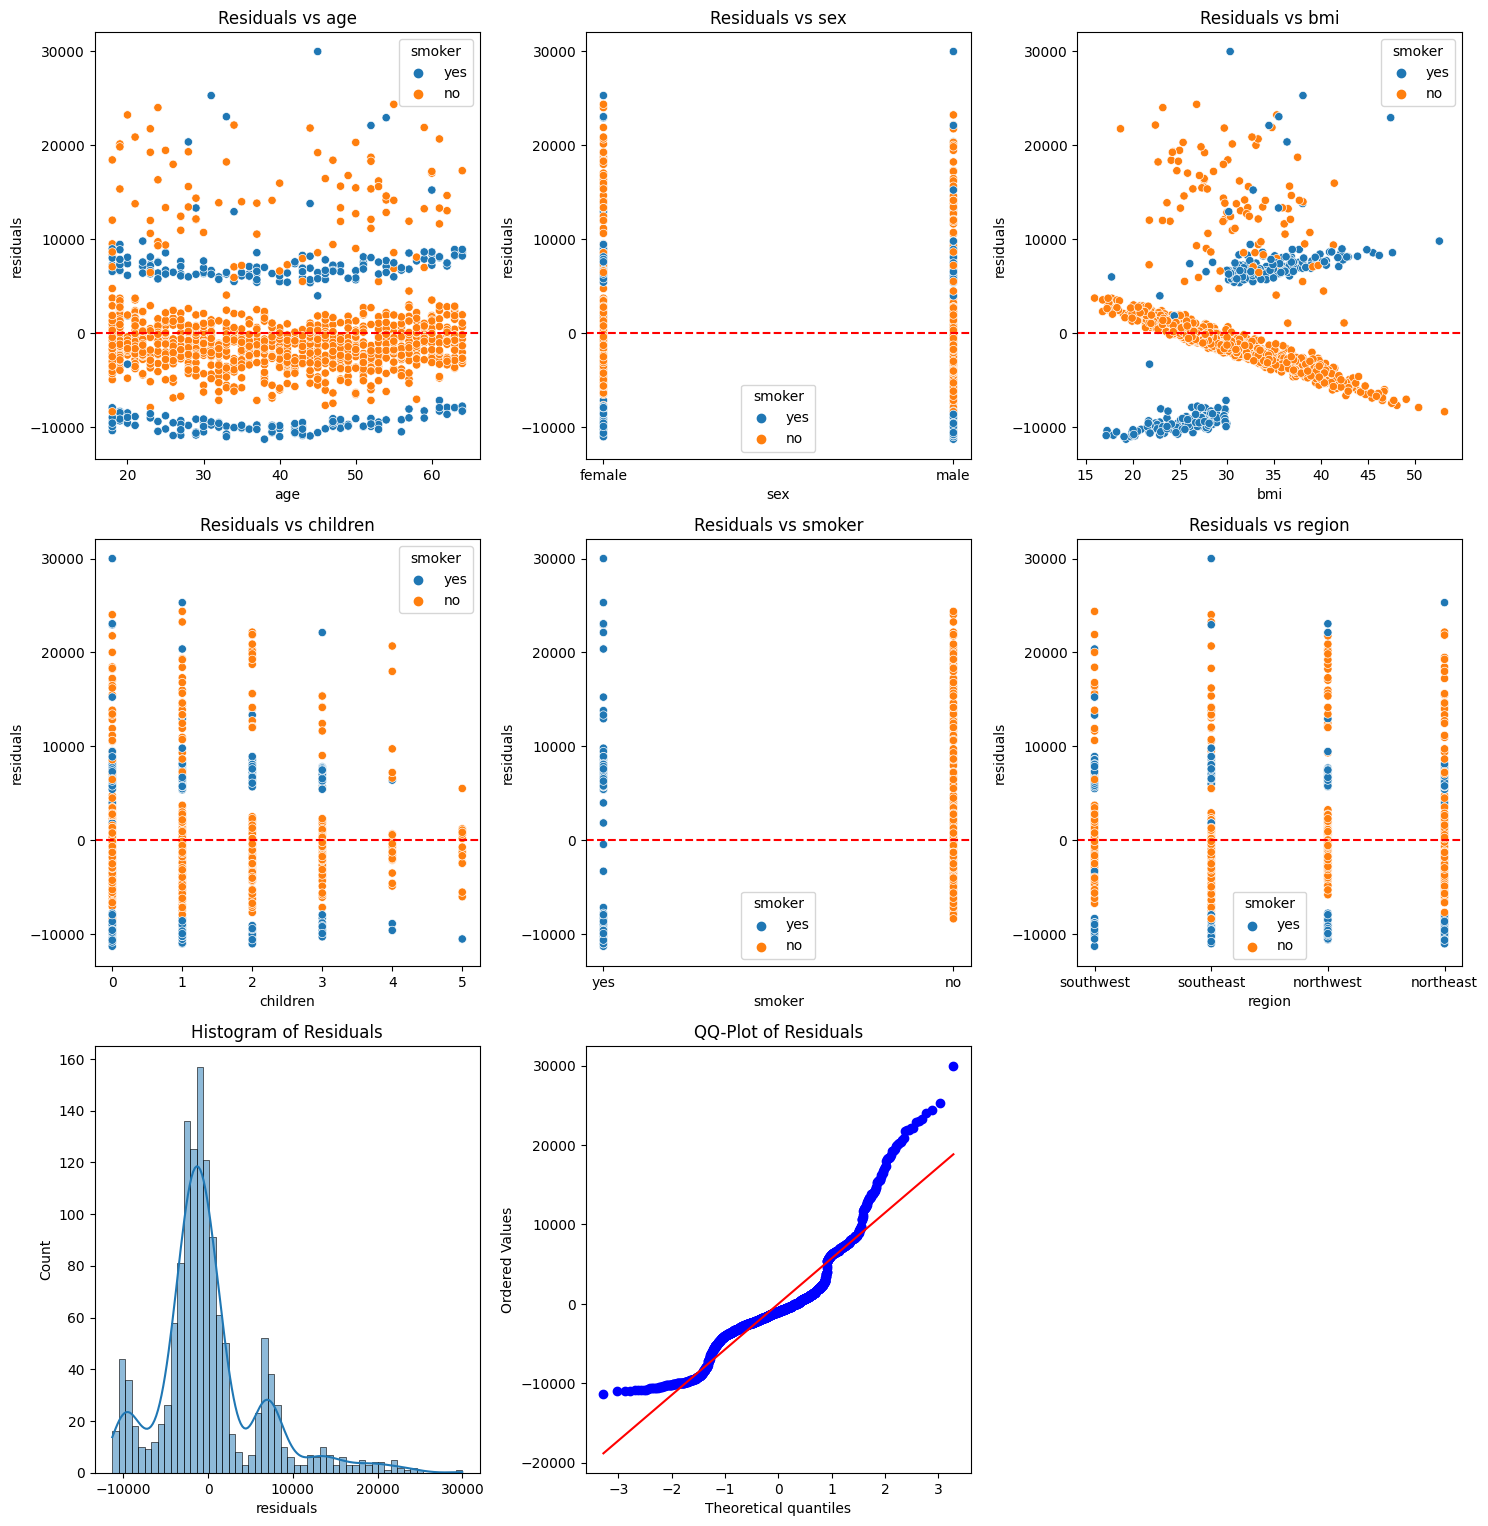

In [13]:
def plot_residuals(data, output_column, prediction_column, categorical_var=None):
    """
    Plot residuals of a model against all variables in the DataFrame. Additionally, plot
    a histogram and a QQ-plot of the residuals.

    Args:
        data (pd.DataFrame): The DataFrame containing the data.
        output_column (str): The name of the output column.
        prediction_column (str): The name of the prediction column.
        categorical_var (str, optional): The name of a categorical variable for coloring. Defaults to None.
    """
    # As before, calculate residuals
    data['residuals'] = data[output_column] - data[prediction_column] 

    # Identify columns to plot (excluding the output and prediction columns)
    columns_to_plot = [col for col in data.columns if col not in [output_column, prediction_column, 'residuals']]

    # Number of rows and columns for the subplot
    n_cols = 3
    n_rows = int(len(columns_to_plot) / n_cols) + 2  # Additional row for histogram and QQ-plot

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

    # Flatten the axes array for easy iteration
    axes = axes.flatten()

    # Plot each variable against the residuals
    for i, col in enumerate(columns_to_plot):
        ax = axes[i]
        
        if categorical_var and categorical_var in data.columns:
            sns.scatterplot(x = data[col], y=data["residuals"], data=data, ax=ax, hue = data[categorical_var])
        else:
            sns.scatterplot(x = data[col], y=data["residuals"], data=data, ax=ax)
        
        ax.set_title(f'Residuals vs {col}')
        ax.axhline(0, ls='--', color='r')

    # Histogram of residuals
    sns.histplot(data['residuals'], kde=True, ax=axes[i + 1])
    axes[i + 1].set_title('Histogram of Residuals')

    # QQ-plot of residuals
    stats.probplot(data['residuals'], dist="norm", plot=axes[i + 2])
    axes[i + 2].set_title('QQ-Plot of Residuals')

    # Hide any unused axes
    for j in range(i + 3, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()


data['predictions'] = model.predict(X)
# Example usage
plot_residuals(data, 'charges', 'predictions', 'smoker')


**What's happening with the residuals?**
> Para este conjunto de datos la distribución residual tiene una forma más parecida a una normal centrada en 0, aunque sigue habiendo una gran cantidad de residuos alejados del 0, como se aprecia en los máximos relativos de "histogram of residuals". Según se observa en las gráficas de residuos para cada variable, se aprecia que la mayor parte de residuos para los no fumadores se encuentran cerca del 0, mientras que para los fumadores se aleja mucho. Esto se aprecia en mayor medida en los gráficos de residual vs age y residual vs bmi. Dando como conclusión que la predicción se adapta en mayor medida a los no fumadores, pudiendo captar sus características de mejor manera y predecirles de manera más realista.

# _Rolling in the deep_

Following the theory taught in class, do the following:

1. **implement the gradient descent algorithm** to train the linear regression model and reproduce the results using this training method. You can find the structure for the gradient descent inside the initial linear regression function, inside the method `fit_gradient_descent`.
2. As final steps, **display the progress of the loss function by plotting the gradient descent steps on the X-axis and the loss function on the Y-axis for each step**. 
3. Additionally, **using the same representation as in the previous section where each axis represents the values of w and b, show the sequence of steps that bring you closer to the optimum each time**. Each step should be a point in space, with coordinates (w,b). Compare all the results with the optimal solution from the scikit fit coefficients.

Feel free to add as many cells as you may need from here onwards in order to fulfill these three tasks

In [40]:
from src.Lab_2_4_LR2 import LinearRegressor
from sklearn.linear_model import LinearRegression

In [41]:
def plot_loss():
    """
    Traza la función de pérdida a lo largo de las iteraciones del descenso de gradiente.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(model.loss_history)), model.loss_history, label="MSE")
    plt.xlabel("Iteraciones")
    plt.ylabel("MSE")
    plt.title("Función de pérdida por iteraciones")
    plt.legend()
    plt.grid(True)
    plt.show()

In [42]:
def plot_wb_traject():
    """
    Dibuja la trayectoria de w (coeficientes) y b (intercepto) a lo largo de las iteraciones, 
    utilizando un gráfico de dispersión con colores para cada w.    
    """
    plt.figure(figsize=(8, 5))

    # Usamos diferentes colores para cada w
    for j in range(len(model.coefficients)):  #Por cada coeficiente
        w_values = [model.w_history[i][j] for i in range(len(model.w_history))]  #w en todas las iteraciones
        b_values = [model.b_history[i] for i in range(len(model.b_history))]     #b en todas las iteraciones
        plt.scatter(w_values, b_values, label=f"w{j}", alpha=0.7)

    plt.xlabel("w (Coeficientes)")
    plt.ylabel("b (Intercepción)")
    plt.title("Acercamiento a valores óptimos de w,b en Gradient Descent")
    plt.legend(title="Coeficientes")
    plt.grid(True)
    plt.show()


In [43]:
def compare_with_sklearn(X, y):
    """
    Compara los coeficientes del modelo ajustado con la solución óptima obtenida de scikit-learn. 
    Muestra las diferencias entre los coeficientes del Descenso de Gradiente y los de scikit-learn.
    """
    model_sklearn = LinearRegression()
    model_sklearn.fit(X, y)

    #Los coeficientes de cada modelo
    print("Coeficientes obtenidos con Gradient Descent:")
    print(f"Intercepción (b): {model.intercept}")
    print(f"Coeficientes (w): {model.coefficients}")

    print("Coeficientes obtenidos con Scikit-learn:")
    print(f"Intercepción (b): {model_sklearn.intercept_}")
    print(f"Coeficientes (w): {model_sklearn.coef_}")

    intercept_diff = model.intercept - model_sklearn.intercept_
    coeff_diff = np.array(model.coefficients) - model_sklearn.coef_

    plt.figure(figsize=(8, 5))

    plt.bar(["Intercepcion (b)"], [intercept_diff], alpha=0.7, label="Diferencia en intercepción")
    plt.bar([f"w{i}" for i in range(len(coeff_diff))], coeff_diff, alpha=0.7, label="Diferencia en coeficientes")

    plt.ylabel("Diferencia de valor")
    plt.title("Diferencia entre los coefficients (Gradient Descent - Scikit-learn)")
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch 0: MSE = 35.076116969497335
Gradient [-0.03566096  0.00066132 -0.00096002 -0.01617359 -0.03106533]: MSE = 35.076116969497335


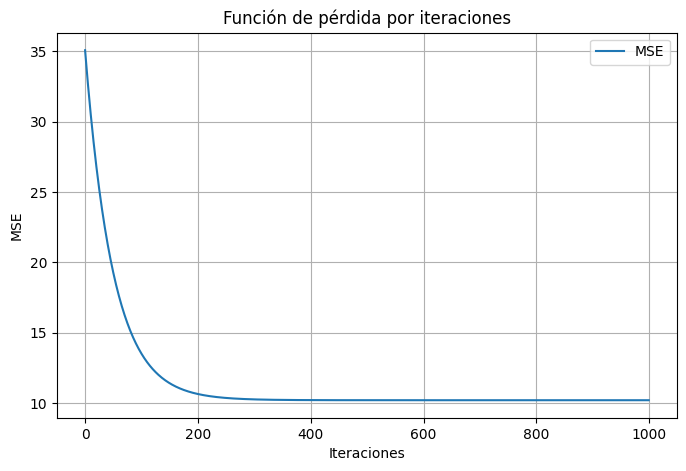

In [ ]:
data = pd.read_csv("synthetic_dataset.csv") #He tenido que mover el csv a esta carpeta porque en la otra no lo detectaba

X = np.array(data[["Input1","Input2","Input3","Input4"]])
y = np.array(data["Output"]) 

model = LinearRegressor()
model.fit(X, y, method="gradient_descent", learning_rate=0.01, iterations=1000)

plot_loss()

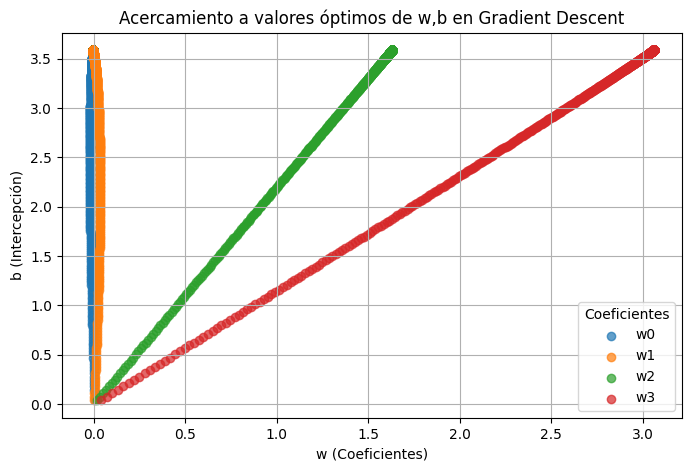

In [45]:
plot_wb_traject()

Coeficientes obtenidos con Gradient Descent:
Intercepción (b): 3.5847359372135976
Coeficientes (w): [-1.93917774e-03 -5.93414258e-03  1.63024742e+00  3.05919622e+00]
Coeficientes obtenidos con Scikit-learn:
Intercepción (b): 3.584902159274909
Coeficientes (w): [-1.91180984e-03 -5.98029466e-03  1.63032400e+00  3.05930873e+00]


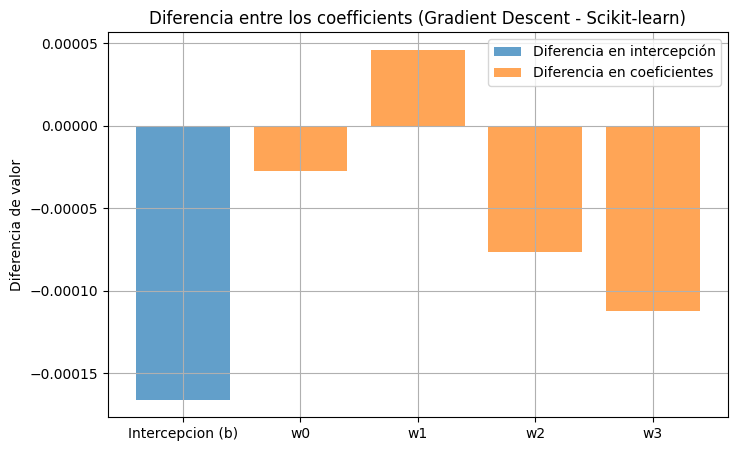

In [46]:
compare_with_sklearn(X, y)